In [1]:
import pandas as pd
import fdb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from decimal import Decimal

In [2]:
#cash_book_path = 'C:/Users/SQL/Documents/BOKOPT_GL_CB_202311291624.csv'
#cash_book = pd.read_csv(cash_book_path)
#cash_book

In [3]:
#cash_book_detail_path ='C:/Users/SQL/Documents/BOKOPT_GL_CBDTL_202311291624.csv'
#cash_book_detail = pd.read_csv(cash_book_detail_path)
#cash_book_detail

In [4]:
hostname = "localhost"
database_path = "C:/eStream/SQLAccounting/DB/VPN.FDB"
username = "SYSDBA"
password = "masterkey"

In [5]:
# Create a connection
connection = fdb.connect(
    host=hostname,
    database=database_path,
    user=username,
    password=password,
)

In [6]:
# Create a Cursor object that operates in the context of Connection con:
cur = connection.cursor()

# Execute the SELECT statement:
cur.execute("select * from GL_CB")

# Fetch all records
records = cur.fetchall()

column_names = [desc[0] for desc in cur.description]

# Close the cursor and connection
cur.close()

cash_book = pd.DataFrame(records, columns=column_names)
cash_book

,DOCKEY,DOCNO,DOCTYPE,DOCDATE,POSTDATE,TAXDATE,DESCRIPTION,DESCRIPTION2,PAYMENTMETHOD,AREA,...,LOCALDOCAMT,FROMDOCTYPE,BOUNCEDDATE,GLTRANSID,CANCELLED,DEPOSITKEY,UPDATECOUNT,PRINTCOUNT,ATTACHMENTS,NOTE
0,3,001/02/07,PV,2007-02-26,2007-02-26,2007-02-26,VPN ENGINEERING SDN.BHD,PYMT COLLECTED BY VPN ENGRG FROM SILVER BILLIO...,3500/001,KL,...,3041.9,SP,None,52378,F,None,3.0,0.0,None,None
1,39,ABB52/11,PV,2008-11-26,2008-11-26,2008-11-26,LOONG HIN SHEN TRADING,OCT'08 PYT ABB003040,3500/001,KL,...,0,SP,None,52385,F,None,1.0,0.0,None,None
2,59,022/02/09,PV,2009-02-28,2009-02-28,2009-02-28,SYARIKAT TATT ENG TAYAR DAN BATTERI,VADIVEL MURUGAN CLAIMS UOB399237,3500/001,PG,...,0,SP,None,52386,F,None,1.0,0.0,None,None
3,71,RHB16/5,PV,2009-05-05,2009-05-05,2009-05-05,KIN KEE HARDWARE SDN BHD,APR'09 INV PYT RHB825409,3500/001,KL,...,1800.69,SP,None,52387,F,None,1.0,0.0,None,None
4,113,RHB63/7,PV,2009-07-20,2009-07-20,2009-07-20,WONG ONN CONSTRUCTION SDN.BHD.,WONG ONN CONSTRUCTION SDN BHD EXTENDS OF BUILD...,3500/001,KL,...,100000,SP,None,52388,F,None,1.0,0.0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43444,118438,18345,OR,2022-06-15,2022-06-15,2022-06-15,MIKAS STAINLESS STEELS PTE LTD - TOL,MAR'22 INV PYT,4100/002,KL,...,90632.3,PM,None,141521,F,None,NaN,0.0,None,None
43445,118440,18346,OR,2022-06-15,2022-06-15,2022-06-15,CIPLI HARDWARE S/B - TOL,MAY'22 INV PYT,4100/002,KL,...,22643.82,PM,None,141522,F,None,NaN,0.0,None,None
43446,118444,18347,OR,2022-06-15,2022-06-15,2022-06-15,LLK AGRO SYSTEM S/B,APR'22 INV PYT,3500/005,KL,...,5760.6,PM,None,141523,F,None,NaN,0.0,None,None
43447,118449,18348,OR,2022-05-19,2022-05-19,2022-05-19,WAWASAN TEGUH S/B - TOL,Payment For Account,4100/002,----,...,57733.5,PM,None,141524,F,None,NaN,0.0,None,None


In [7]:
# Create a Cursor object that operates in the context of Connection con:
cur = connection.cursor()

# Execute the SELECT statement:
cur.execute("select * from GL_CBDTL")

# Fetch all records
records = cur.fetchall()

column_names = [desc[0] for desc in cur.description]

# Close the cursor and connection
cur.close()
connection.close()

cash_book_detail = pd.DataFrame(records, columns=column_names)
cash_book_detail

,DTLKEY,DOCKEY,SEQ,AREA,AGENT,PROJECT,CODE,DESCRIPTION,GST_DOCDATE,GST_DOCNO,...,TARIFF,TAXRATE,TAXAMT,LOCALTAXAMT,TAXINCLUSIVE,AMOUNT,LOCALAMOUNT,CURRENCYCODE,CURRENCYRATE,CURRENCYAMOUNT
0,274,165,1,KL,----,----,40C1/002,DISCOUNT RECD,None,None,...,None,None,0,0,0,0,0,----,1,0
1,2463,2462,1,KL,V1,----,30A1/034,SEP'09 PYT,None,None,...,None,None,0,0,0,11415,11415,----,1,11415
2,2350,2349,1,----,----,----,7000/W02,PILI BOMBA - NOV'09 - SYABAS COLLECTION A/C,None,None,...,None,None,0,0,0,36,36,----,1,36
3,3557,3556,1,PG,----,----,30Z2/CS1,NOV & DEC'09 PYT,None,None,...,None,None,0,0,0,2685,2685,----,1,2685
4,2343,2342,1,PG,----,----,30Z2/CS1,AUG'09 PART PYT,None,None,...,None,None,0,0,0,362,362,----,1,362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59930,118455,118454,1,----,R1,----,3000/W027,Payment For Account,None,None,...,None,,0,0,0,4143,4143,----,1,4143
59931,118456,117742,1,KL,----,----,40Z1/M16,ADV.PYT - PRO.INV 20220568,None,None,...,None,None,0,0,0,8029.3,8029.3,----,1,8029.3
59932,118457,118086,1,KL,----,----,40N1/002,JUN'22 INV PYT,None,None,...,None,None,0,0,0,550123.95,550123.95,----,1,550123.95
59933,118458,118104,1,KL,----,----,40N1/002,JUN'22 INV PYT,None,None,...,None,None,0,0,0,500346,500346,----,1,500346


In [8]:
cash_book_column = cash_book.columns
print(cash_book_column)

Index(['DOCKEY', 'DOCNO', 'DOCTYPE', 'DOCDATE', 'POSTDATE', 'TAXDATE',
       'DESCRIPTION', 'DESCRIPTION2', 'PAYMENTMETHOD', 'AREA', 'AGENT',
       'PROJECT', 'JOURNAL', 'CHEQUENUMBER', 'CURRENCYCODE', 'CURRENCYRATE',
       'BANKCHARGE', 'BANKCHARGEACCOUNT', 'DOCAMT', 'LOCALDOCAMT',
       'FROMDOCTYPE', 'BOUNCEDDATE', 'GLTRANSID', 'CANCELLED', 'DEPOSITKEY',
       'UPDATECOUNT', 'PRINTCOUNT', 'ATTACHMENTS', 'NOTE'],
      dtype='object')


In [9]:
cash_book_detail_column = cash_book_detail.columns
print(cash_book_detail_column)

Index(['DTLKEY', 'DOCKEY', 'SEQ', 'AREA', 'AGENT', 'PROJECT', 'CODE',
       'DESCRIPTION', 'GST_DOCDATE', 'GST_DOCNO', 'COMPANYNAME', 'REGISTERNO',
       'GSTNO', 'PERMITNO', 'COUNTRY', 'TAX', 'TARIFF', 'TAXRATE', 'TAXAMT',
       'LOCALTAXAMT', 'TAXINCLUSIVE', 'AMOUNT', 'LOCALAMOUNT', 'CURRENCYCODE',
       'CURRENCYRATE', 'CURRENCYAMOUNT'],
      dtype='object')


In [10]:
cash_book = cash_book.drop(['DOCNO', 'POSTDATE', 'TAXDATE',
       'DESCRIPTION', 'DESCRIPTION2', 'PAYMENTMETHOD', 'AREA', 'AGENT',
       'PROJECT', 'JOURNAL', 'CHEQUENUMBER', 'CURRENCYCODE', 'CURRENCYRATE',
       'BANKCHARGE', 'BANKCHARGEACCOUNT', 'DOCAMT', 'LOCALDOCAMT',
       'FROMDOCTYPE', 'BOUNCEDDATE', 'GLTRANSID', 'CANCELLED', 'DEPOSITKEY',
       'UPDATECOUNT', 'PRINTCOUNT', 'ATTACHMENTS', 'NOTE'], axis=1)

cash_book_detail = cash_book_detail.drop(['DTLKEY', 'SEQ', 'AREA', 'AGENT', 'PROJECT',
       'DESCRIPTION', 'GST_DOCDATE', 'GST_DOCNO', 'COMPANYNAME', 'REGISTERNO',
       'GSTNO', 'PERMITNO', 'COUNTRY', 'TAX', 'TARIFF', 'TAXRATE', 'TAXAMT',
       'LOCALTAXAMT', 'TAXINCLUSIVE', 'AMOUNT', 'LOCALAMOUNT', 'CURRENCYCODE',
       'CURRENCYRATE'], axis=1)

In [11]:
merged_cash_book = pd.merge(cash_book, cash_book_detail, on='DOCKEY')
merged_cash_book

,DOCKEY,DOCTYPE,DOCDATE,CODE,CURRENCYAMOUNT
0,3,PV,2007-02-26,40Z1/V04,3041.9
1,39,PV,2008-11-26,40Z1/L18,0
2,59,PV,2009-02-28,40Z2/S01,0
3,71,PV,2009-05-05,40K1/020,1800.69
4,113,PV,2009-07-20,40W1/005,100000
...,...,...,...,...,...
59930,118438,OR,2022-06-15,3000/M034,90632.3
59931,118440,OR,2022-06-15,3000/C039,22643.82
59932,118444,OR,2022-06-15,3000/L011,5760.6
59933,118449,OR,2022-05-19,3000/W024,57733.5


In [12]:
# Convert 'DOCDATE' to datetime
merged_cash_book['DOCDATE'] = pd.to_datetime(merged_cash_book['DOCDATE'])

# Extract year, month, and day into separate columns
merged_cash_book['Year'] = merged_cash_book['DOCDATE'].dt.year
merged_cash_book['Month'] = merged_cash_book['DOCDATE'].dt.month
merged_cash_book['Day'] = merged_cash_book['DOCDATE'].dt.day

# Drop the original 'DOCDATE' column
merged_cash_book.drop('DOCDATE', axis=1, inplace=True)

merged_cash_book

,DOCKEY,DOCTYPE,CODE,CURRENCYAMOUNT,Year,Month,Day
0,3,PV,40Z1/V04,3041.9,2007,2,26
1,39,PV,40Z1/L18,0,2008,11,26
2,59,PV,40Z2/S01,0,2009,2,28
3,71,PV,40K1/020,1800.69,2009,5,5
4,113,PV,40W1/005,100000,2009,7,20
...,...,...,...,...,...,...,...
59930,118438,OR,3000/M034,90632.3,2022,6,15
59931,118440,OR,3000/C039,22643.82,2022,6,15
59932,118444,OR,3000/L011,5760.6,2022,6,15
59933,118449,OR,3000/W024,57733.5,2022,5,19


In [13]:
merged_cash_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59935 entries, 0 to 59934
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DOCKEY          59935 non-null  int64 
 1   DOCTYPE         59935 non-null  object
 2   CODE            59935 non-null  object
 3   CURRENCYAMOUNT  59935 non-null  object
 4   Year            59935 non-null  int32 
 5   Month           59935 non-null  int32 
 6   Day             59935 non-null  int32 
dtypes: int32(3), int64(1), object(3)
memory usage: 2.5+ MB


In [14]:
# Group by 'CODE' and collect 'CURRENCYAMOUNT' into lists
grouped_data = merged_cash_book.groupby(['CODE'])['CURRENCYAMOUNT'].apply(list).reset_index()

# Sort the 'CURRENCYAMOUNT' arrays in ascending order
grouped_data['CURRENCYAMOUNT'] = grouped_data['CURRENCYAMOUNT'].apply(lambda x: sorted(x))

# Display the resulting DataFrame
grouped_data

,CODE,CURRENCYAMOUNT
0,2000/C01,"[20, 40, 81.3, 90, 100, 200, 420, 486.9, 500, ..."
1,2000/F01,[2125]
2,2000/M01,"[399, 750, 1600, 1800, 2600, 3000, 5000, 6359,..."
3,2000/O01,"[580, 1032, 2080, 2799.5, 3000, 3534, 5050, 66..."
4,2000/O02,[1945]
...,...,...
2243,9100/B18,"[11.45, 14.88, 14.94, 15.29, 20.11, 20.93, 24...."
2244,9100/B21,"[500, 500, 500, 500, 500, 590, 2000, 4000, 500..."
2245,GST-KASTAM,"[1029.1, 4484.55, 9460.15, 15464.61, 17726.66,..."
2246,PREPAYMENT,"[200, 300, 4903.4, 15000, 21716.34]"


In [15]:
def plot_confidence_interval(code, mean, confidence_interval, new_amount, existing_data):
    plt.figure(figsize=(8, 6))

    # Plot the mean
    plt.plot([mean, mean], [0, 1], color='red', linestyle='dashed', linewidth=2, label='Mean')

    # Plot the confidence interval
    plt.plot([confidence_interval[0], confidence_interval[0]], [0, 1], color='green', linestyle='dashed', linewidth=2, label='Lower Bound')
    plt.plot([confidence_interval[1], confidence_interval[1]], [0, 1], color='green', linestyle='dashed', linewidth=2, label='Upper Bound')

    # Plot the new amount
    plt.plot([new_amount, new_amount], [0, 1], color='orange', linestyle='dashed', linewidth=2, label='New Amount')

    # Plot the existing data points
    plt.scatter(existing_data, np.zeros_like(existing_data), c=np.where((existing_data < confidence_interval[0]) | (existing_data > confidence_interval[1]), 'red', 'blue'), label='Existing Data', alpha=0.7)

    plt.title(f'Confidence Interval for CODE: {code}')
    plt.xlabel('CURRENCYAMOUNT')
    plt.yticks([])
    plt.legend()
    plt.show()

In [16]:
def check_new_input(code, new_amount, confidence_level_setup):
    # Convert CURRENCYAMOUNT values to float
    existing_data = grouped_data[grouped_data['CODE'] == code]['CURRENCYAMOUNT'].explode().astype(float)

    if len(existing_data) == 0:
        return "No information found for the given code."

    # Calculate mean and standard deviation using the existing data
    mean = np.mean(existing_data)
    std_dev = np.std(existing_data, ddof=1)

    # Set confidence level and degrees of freedom
    confidence_level = confidence_level_setup
    degrees_of_freedom = len(existing_data) - 1

    # Calculate the margin of error
    margin_of_error = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom) * (std_dev / np.sqrt(len(existing_data)))

    # Calculate confidence interval
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error

    # Check if the bounds are negative and adjust if needed
    if lower_bound < 0:
        lower_bound = 0

    if upper_bound < 0:
        upper_bound = 0

    confidence_interval = (lower_bound, upper_bound)

    # Check if the new amount is within the confidence interval
    if confidence_interval[0] <= new_amount <= confidence_interval[1]:
        status = "within"
        percentage_outside = 0.0
    else:
        # Calculate the percentage outside of the confidence interval
        if new_amount < lower_bound:
            status = "lower"
            percentage_outside = 100.0 * (lower_bound - new_amount) / mean
        else:
            status = "upper"
            percentage_outside = 100.0 * (new_amount - upper_bound) / mean

    # Print the result with the desired output style
    result = f"Mean: {mean}\nConfidence Interval: {confidence_interval}\nThe new amount {new_amount} is {status} the range"
    if status == "lower":
        result += f"\nPercentage Lower: {percentage_outside:.2f}%"
    elif status == "upper":
        result += f"\nPercentage Upper: {percentage_outside:.2f}%"

    # Display the confidence interval graph with data points
    plot_confidence_interval(code, mean, confidence_interval, new_amount, existing_data)

    return result

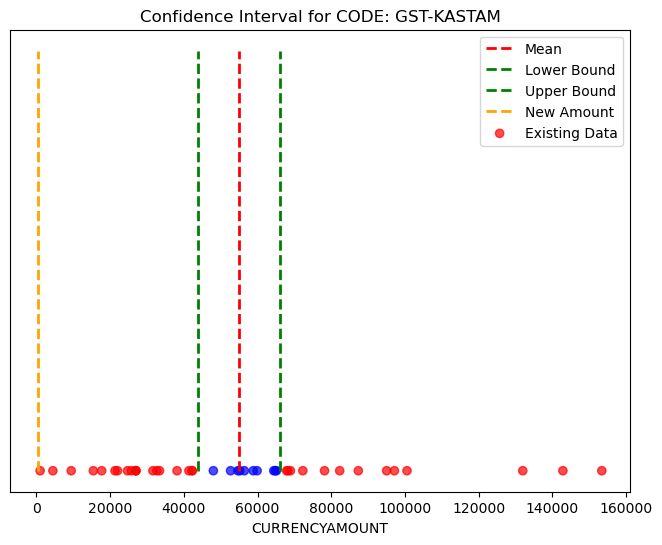

Mean: 55024.12571428571
Confidence Interval: (43984.293845267224, 66063.95758330419)
The new amount 500 is lower the range
Percentage Lower: 79.03%


In [19]:
# user input:
code_input = 'GST-KASTAM'
confidence_level_setup = 0.95
new_amount_input = 500

result = check_new_input(code_input, new_amount_input, confidence_level_setup)
print(result)